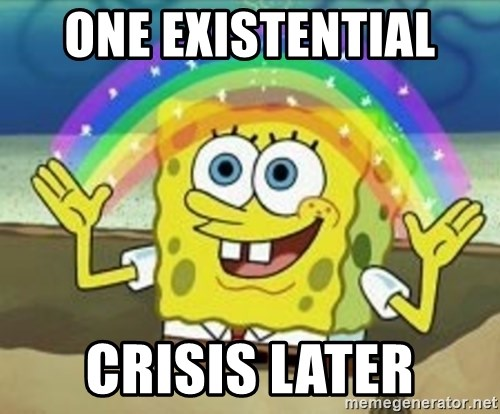

1. Introduction to Decision Tree algorithm 


A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

At the beginning, the whole training set is considered as the root.
Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
Records are distributed recursively on the basis of attribute values.
Order to placing attributes as root or internal node of the tree is done by using some statistical approach.
I will describe Decision Tree terminology in later section.

2. Classification and Regression Trees (CART) 

Nowadays, Decision Tree algorithm is known by its modern name CART which stands for Classification and Regression Trees. Classification and Regression Trees or CART is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.

The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees. As we are solving a classification problem, we decided to give it a try with the Decision Tree Classification algorithm. 

The Decision Tree algorithm intuition is as follows:

        For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

        For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

        This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = 'SC_data_new.csv'

df = pd.read_csv(data)

In [4]:
df.shape


(169713, 93)

In [5]:
df.head()


,id,FIRST_MOB,default_flag,ACC_ST_A_Dt_SUM,working_months_new,POSIT_INT_INST_MIN,TRX_CH_CD_PAYMENT_ORDER_MIN3,NKP_first_cd1,not_work_months_new,average_salary_last_3months,...,NKP_Code_Curr_cd1,Miscellaneous Stores_SUM12,ACC_ONE_CUST_CNT12,POSIT_PRINC_INST_MIN3,RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MAX12,CURR_CD_OTH_MAX12,CNT_ACC_ONE_CUST_CH_12,TRX_CH_CD_PAYMENT_ORDER_CNT_CH_12,TRX_CH_CD_E_CHANNEL_MIN_CH_6,Miscellaneous Stores_MIN_CH_6
0,0,8/31/2017,0,-0.261387,240,-0.476122,0.043286,5,-0.820406,-0.393088,...,4,-0.323575,-0.270938,-0.118120,-0.150120,999999.000000,1.332474,0.692350,0.310368,0.454701
1,1,8/31/2017,0,0.329268,180,-0.672053,-0.144485,2,3.667009,1.916147,...,999999,0.539598,1.013528,-0.194047,0.113804,999999.000000,1.332474,0.692350,0.603401,-2.384447
2,2,8/31/2017,0,0.090022,120,999999.000000,0.173523,8,-0.820406,-0.139806,...,8,0.184667,0.628188,0.114569,-0.030529,-0.152129,1.332474,0.692350,0.603401,0.099843
3,3,8/31/2017,0,0.088147,180,3.395171,-0.150696,9,-0.597429,-0.861823,...,9,-0.024104,-0.270938,-0.076462,-0.212531,-0.104904,1.332474,0.952748,0.603401,0.454701
4,4,8/31/2017,0,-0.175203,240,2.342245,0.457788,1,-0.820406,0.617904,...,1,-0.323575,-0.270938,0.265457,999999.000000,999999.000000,1.332474,0.692350,0.603372,0.454701


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169713 entries, 0 to 169712
Data columns (total 93 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   id                                        169713 non-null  int64  
 1   FIRST_MOB                                 169713 non-null  object 
 2   default_flag                              169713 non-null  int64  
 3   ACC_ST_A_Dt_SUM                           169713 non-null  float64
 4   working_months_new                        169713 non-null  int64  
 5   POSIT_INT_INST_MIN                        169713 non-null  float64
 6   TRX_CH_CD_PAYMENT_ORDER_MIN3              169713 non-null  float64
 7   NKP_first_cd1                             169713 non-null  int64  
 8   not_work_months_new                       169713 non-null  float64
 9   average_salary_last_3months               169713 non-null  float64
 10  Miscellaneous Stores

In [7]:
print(list(df.columns))

['id', 'FIRST_MOB', 'default_flag', 'ACC_ST_A_Dt_SUM', 'working_months_new', 'POSIT_INT_INST_MIN', 'TRX_CH_CD_PAYMENT_ORDER_MIN3', 'NKP_first_cd1', 'not_work_months_new', 'average_salary_last_3months', 'Miscellaneous Stores_MAX12', 'TRX_CTRY_CD_OTH_MAX12', 'Government Services_MAX12', 'ODUE_DAYS_MAX6', 'NKP_Code_Curr_cd2', 'term_one_year_BALL', 'Ct_CNT', 'TRX_CTRY_CD_BG_Ct_MIN3', 'TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12', 'FLDLG60029', 'Retail Stores_MAX12', 'Government Services_CNT12', 'Retail Stores_MIN6', 'INT_ODUE_CNT12', 'NonBankCount', 'Automobile and Vehicles_MAX12', 'Clothing Stores_CNT12', 'Utilities_AVG12', 'Clothing Stores_MAX12', 'TBALL_TSUMA', 'ODUE_DAYS_MAX12', 'TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12', 'PENSII_SUM_L3M_CH', 'RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MIN12', 'UCB_bankAccountOldestOpenDate', 'INST_PAID_LATE_CNT12', 'RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_CNT12', 'Retail Stores_SUM12', 'CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_CNT12', 'STAT1PROV_CNT12', 'LOAN_INST_COMP_MIN', 'Utilities_CNT12'

In [8]:
col_names = ['id', 'FIRST_MOB', 'default_flag', 'ACC_ST_A_Dt_SUM', 'working_months_new', 'POSIT_INT_INST_MIN', 'TRX_CH_CD_PAYMENT_ORDER_MIN3', 'NKP_first_cd1', 'not_work_months_new', 'average_salary_last_3months', 'Miscellaneous Stores_MAX12', 'TRX_CTRY_CD_OTH_MAX12', 'Government Services_MAX12', 'ODUE_DAYS_MAX6', 'NKP_Code_Curr_cd2', 'term_one_year_BALL', 'Ct_CNT', 'TRX_CTRY_CD_BG_Ct_MIN3', 'TRX_CTRY_BG_TRX_CH_E_CHANNEL_AVG12', 'FLDLG60029', 'Retail Stores_MAX12', 'Government Services_CNT12', 'Retail Stores_MIN6', 'INT_ODUE_CNT12', 'NonBankCount', 'Automobile and Vehicles_MAX12', 'Clothing Stores_CNT12', 'Utilities_AVG12', 'Clothing Stores_MAX12', 'TBALL_TSUMA', 'ODUE_DAYS_MAX12', 'TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12', 'PENSII_SUM_L3M_CH', 'RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MIN12', 'UCB_bankAccountOldestOpenDate', 'INST_PAID_LATE_CNT12', 'RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_CNT12', 'Retail Stores_SUM12', 'CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_CNT12', 'STAT1PROV_CNT12', 'LOAN_INST_COMP_MIN', 'Utilities_CNT12', 'LOAN_INST_COMP_MIN12', 'Miscellaneous Stores_MIN12', 'Automobile and Vehicles_CNT12', 'TRX_CTRY_CD_BG_MAX', 'CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_MIN12', 'POSIT_PRINC_INST_MIN', 'POSIT_PRINC_INST_MIN6', 'CURR_CD_OTH_MIN12', 'POSIT_INT_INST_MIN12', 'BUCKET_MAX12', 'Date_oldest_account_UCFIN', 'TRX_CTRY_CD_OTH_CNT12', 'TRX_CTRY_CD_OTH_SUM12', 'TRX_CTRY_CD_OTH_MIN12', 'Service Providers_MIN', 'CURR_CD_OTH_CNT12', 'BALANS_3M_12M_TRND', 'TRX_CNT_TOT', 'WORST_C70_CNT12', 'BETS_SUM_L3M_CH', 'LOAN_INST_COMP_MIN6', 'Starting_month_curr_empl', 'Num_applications_L6M', 'Clothing Stores_MIN12', 'ActiveLoanCountNonBank', 'Dt_SUM3', 'Automobile and Vehicles_SUM12', 'POSIT_PRINC_INST_MAX', 'NKP_first_cd2', 'Utilities_MAX12', 'Service Providers_MIN6', 'Automobile and Vehicles_MIN12', 'ACC_ST_A_CNT12', 'PAYM_DAYS_AVG12', 'LOAN_INST_COMP_MIN3', 'Num_loans_L6M', 'Current_Unsecured_Loan_Exposure', 'Government Services_MIN12', 'TRX_CH_CD_PAYMENT_ORDER_CNT12', 'CURR_CD_BGN_TRX_CH_CASH_PAYMENT_DT_SUM12', 'POSIT_PRINC_INST_MIN12', 'NKP_Code_Curr_cd1', 'Miscellaneous Stores_SUM12', 'ACC_ONE_CUST_CNT12', 'POSIT_PRINC_INST_MIN3', 'RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MAX12', 'CURR_CD_OTH_MAX12', 'CNT_ACC_ONE_CUST_CH_12', 'TRX_CH_CD_PAYMENT_ORDER_CNT_CH_12', 'TRX_CH_CD_E_CHANNEL_MIN_CH_6', 'Miscellaneous Stores_MIN_CH_6']


for col in col_names:
    
    print(df[col].value_counts()) 

0         1
113136    1
113138    1
113139    1
113140    1
         ..
56572     1
56573     1
56574     1
56575     1
169712    1
Name: id, Length: 169713, dtype: int64
2/28/2019     6242
10/31/2018    6083
2/28/2018     6046
3/31/2019     6026
12/31/2017    6023
10/31/2017    5977
12/31/2018    5926
3/31/2018     5905
1/30/2019     5799
11/30/2017    5783
11/30/2018    5460
1/30/2018     5444
9/29/2019     5408
8/31/2019     5350
8/31/2018     5254
5/31/2018     5116
4/30/2019     5104
9/28/2017     5086
9/28/2018     5071
8/31/2017     5058
6/30/2018     5014
5/31/2019     4823
4/30/2018     4521
6/30/2019     4313
3/31/2020     4146
2/29/2020     4103
7/31/2018     3931
1/30/2020     3795
4/30/2020     3723
7/31/2019     3698
10/31/2019    3431
5/31/2020     3257
6/30/2020     2769
7/31/2020     2306
12/31/2019    2268
11/30/2019    1454
Name: FIRST_MOB, dtype: int64
0    168757
1       956
Name: default_flag, dtype: int64
 999999.000000    47843
-0.207119          1185
-0.189186 

 999999.000000    22821
 0.804777          1556
-2.373745           468
-0.784484            25
-0.466632            24
                  ...  
 0.565843             1
-0.710905             1
-0.209030             1
 0.143653             1
-0.124558             1
Name: TBALL_TSUMA, Length: 140576, dtype: int64
-0.205990         80604
 999999.000000    37726
-0.198939          5206
-0.177787          4311
-0.184838          4173
                  ...  
 0.618946             1
 0.823417             1
 0.604844             1
 11.054029            1
 0.470880             1
Name: ODUE_DAYS_MAX12, Length: 256, dtype: int64
 999999.000000    100136
-0.129453           5243
-0.132966           2419
-0.130356           1679
-0.127696           1645
                   ...  
-0.140795              1
-0.153704              1
 1.411391              1
-0.108834              1
-0.054182              1
Name: TRX_CH_CD_PAYMENT_ORDER_Dt_MIN12, Length: 9063, dtype: int64
0         168667
999999      1046

 999999.000000    24221
-0.795220         18033
-0.720508         10709
-0.645796          9898
-0.571084          9767
                  ...  
 9.216183             1
 11.009270            1
 10.560998            1
 8.693199             1
 7.348384             1
Name: TRX_CNT_TOT, Length: 181, dtype: int64
 0.730548    91488
-1.822085    28879
 0.517829     9217
 0.305109     5790
 0.092390     5285
-0.120330     5062
-0.333049     4956
-0.545768     4396
-0.758488     3483
-0.971207     3318
-1.183926     3082
-1.396646     2744
-1.609365     2013
Name: WORST_C70_CNT12, dtype: int64
0         168667
999999      1046
Name: BETS_SUM_L3M_CH, dtype: int64
 999999.000000    45515
-0.044406         15758
-0.044330          7313
-0.044254          4631
-0.044178          3030
                  ...  
 0.272623             1
 0.366440             1
 0.747484             1
 0.487094             1
-0.448182             1
Name: LOAN_INST_COMP_MIN6, Length: 7859, dtype: int64
-0.856460    9522
-0

 0.454701    116032
 0.099843     16210
 0.454665     12317
-2.384447      1913
-2.384447       533
              ...  
-2.384447         1
-2.384447         1
-2.384445         1
-2.384446         1
-2.384444         1
Name: Miscellaneous Stores_MIN_CH_6, Length: 915, dtype: int64


In [9]:
df['default_flag'].value_counts()

0    168757
1       956
Name: default_flag, dtype: int64

In [10]:
df.isnull().sum()

id                                   0
FIRST_MOB                            0
default_flag                         0
ACC_ST_A_Dt_SUM                      0
working_months_new                   0
                                    ..
CURR_CD_OTH_MAX12                    0
CNT_ACC_ONE_CUST_CH_12               0
TRX_CH_CD_PAYMENT_ORDER_CNT_CH_12    0
TRX_CH_CD_E_CHANNEL_MIN_CH_6         0
Miscellaneous Stores_MIN_CH_6        0
Length: 93, dtype: int64

In [11]:
#EXPERIMENTAL DROPPING THE COLUMNS THAT WE DONT LIKE 
X = df.drop(['default_flag','FIRST_MOB'], axis=1)

y = df['default_flag']

In [12]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train.shape, X_test.shape

((135770, 91), (33943, 91))

In [14]:
# check data types in X_train

X_train.dtypes

id                                     int64
ACC_ST_A_Dt_SUM                      float64
working_months_new                     int64
POSIT_INT_INST_MIN                   float64
TRX_CH_CD_PAYMENT_ORDER_MIN3         float64
                                      ...   
CURR_CD_OTH_MAX12                    float64
CNT_ACC_ONE_CUST_CH_12               float64
TRX_CH_CD_PAYMENT_ORDER_CNT_CH_12    float64
TRX_CH_CD_E_CHANNEL_MIN_CH_6         float64
Miscellaneous Stores_MIN_CH_6        float64
Length: 91, dtype: object

In [15]:
X_train.head()

,id,ACC_ST_A_Dt_SUM,working_months_new,POSIT_INT_INST_MIN,TRX_CH_CD_PAYMENT_ORDER_MIN3,NKP_first_cd1,not_work_months_new,average_salary_last_3months,Miscellaneous Stores_MAX12,TRX_CTRY_CD_OTH_MAX12,...,NKP_Code_Curr_cd1,Miscellaneous Stores_SUM12,ACC_ONE_CUST_CNT12,POSIT_PRINC_INST_MIN3,RUB_CD_IIN_TRX_CH_PAYMENT_ORDER_MAX12,CURR_CD_OTH_MAX12,CNT_ACC_ONE_CUST_CH_12,TRX_CH_CD_PAYMENT_ORDER_CNT_CH_12,TRX_CH_CD_E_CHANNEL_MIN_CH_6,Miscellaneous Stores_MIN_CH_6
24370,24370,-0.085947,120,-0.021095,-0.203019,5,0.127247,0.153417,-0.056659,-0.137156,...,4,1.119114,0.628188,0.023581,0.014398,-0.154863,-0.679694,-1.130648,0.603401,-2.384447
102790,102790,999999.000000,240,0.214343,999999.000000,4,-0.513812,2.795583,-0.087536,999999.000000,...,1,-0.057841,-0.399385,-0.022661,999999.000000,999999.000000,-0.679694,0.952748,0.603372,0.454701
1649,1649,0.847676,120,4.883140,-0.115933,3,-0.820406,2.190886,999999.000000,999999.000000,...,3,-0.323575,-0.527832,-0.103741,999999.000000,999999.000000,1.332474,0.692350,-1.741101,0.454701
135574,135574,-0.129112,60,999999.000000,-0.073103,9,-0.485940,-0.284761,-0.432587,-0.137636,...,9,-0.294002,-0.270938,999999.000000,-0.108930,-0.151118,-0.679694,-1.130648,0.603401,0.454701
51052,51052,999999.000000,360,-0.669986,0.869143,3,-0.820406,0.395108,999999.000000,999999.000000,...,2,-0.323575,-0.527832,-0.084115,999999.000000,999999.000000,1.619893,0.952748,0.603401,0.454701


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=1000, min_samples_leaf=500, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=500,
                       min_samples_split=1000, random_state=0)

In [21]:
y_pred_gini = clf_gini.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9942


In [23]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9944


In [25]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9944
Test set score: 0.9942


[Text(0.4366968457943925, 0.96875, 'X[2] <= 90.0\ngini = 0.011\nsamples = 135770\nvalue = [135010, 760]'),
 Text(0.1205607476635514, 0.90625, 'X[83] <= -0.207\ngini = 0.024\nsamples = 24531\nvalue = [24229, 302]'),
 Text(0.0616822429906542, 0.84375, 'X[68] <= 53.5\ngini = 0.041\nsamples = 8797\nvalue = [8614, 183]'),
 Text(0.029906542056074768, 0.78125, 'X[7] <= -0.806\ngini = 0.025\nsamples = 4357\nvalue = [4301, 56]'),
 Text(0.014953271028037384, 0.71875, 'X[43] <= 0.167\ngini = 0.042\nsamples = 1367\nvalue = [1338, 29]'),
 Text(0.007476635514018692, 0.65625, 'gini = 0.016\nsamples = 765\nvalue = [759, 6]'),
 Text(0.022429906542056073, 0.65625, 'gini = 0.073\nsamples = 602\nvalue = [579, 23]'),
 Text(0.044859813084112146, 0.71875, 'X[31] <= -0.043\ngini = 0.018\nsamples = 2990\nvalue = [2963, 27]'),
 Text(0.037383177570093455, 0.65625, 'gini = 0.041\nsamples = 529\nvalue = [518, 11]'),
 Text(0.052336448598130844, 0.65625, 'X[45] <= 0.315\ngini = 0.013\nsamples = 2461\nvalue = [2445, 

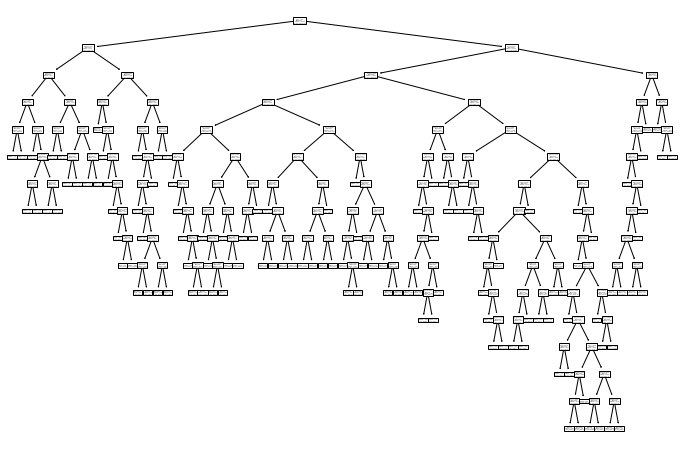

In [26]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 


WOW! We got a tree!

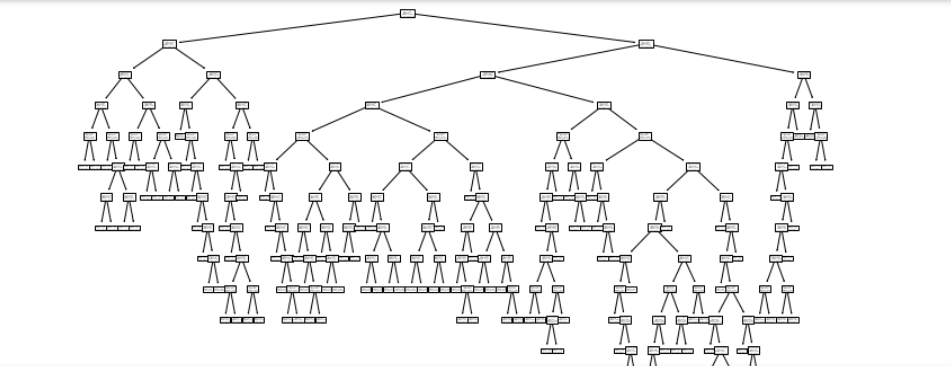

In [27]:
import graphviz

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=None,  
                              filled=True, rounded=True,  
                              special_characters=True)



graph = graphviz.Source(dot_data)

graph.render('dtree_render_example',view=True)



'dtree_render_example.pdf'

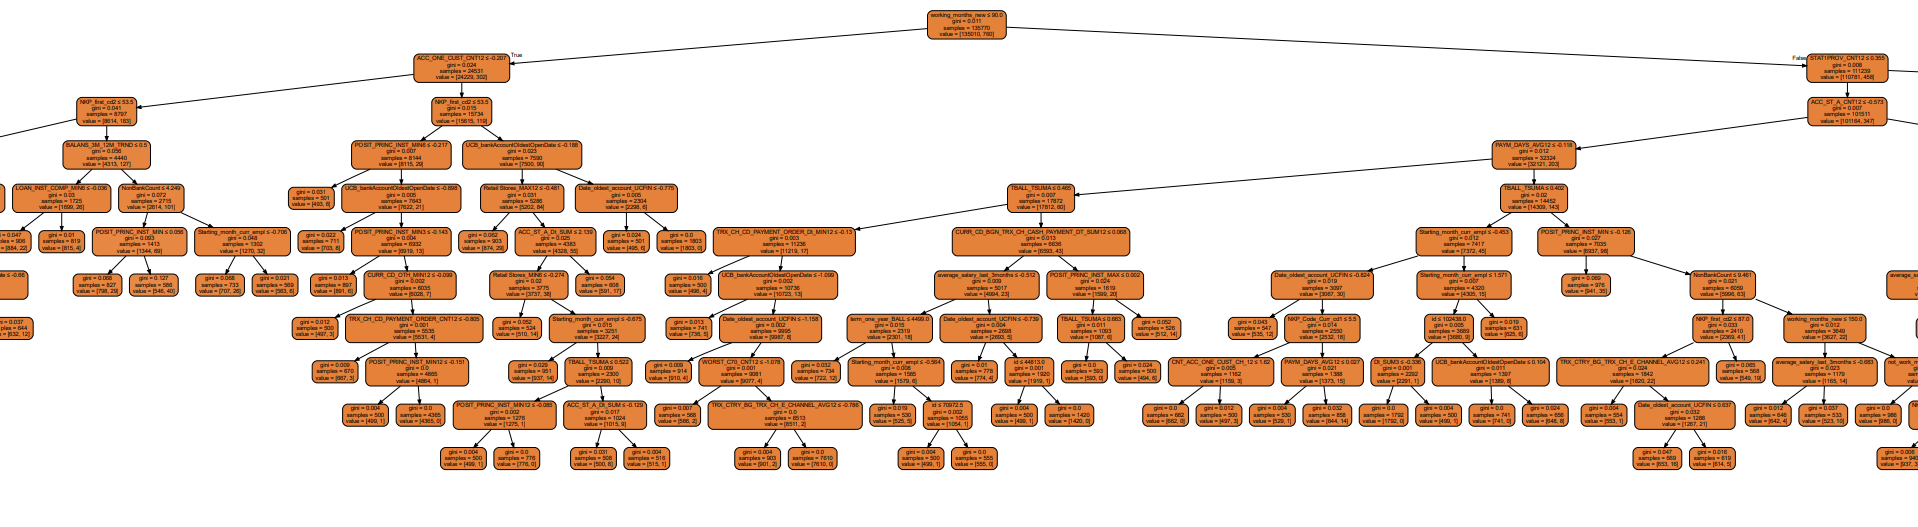

A tree that we can read through!

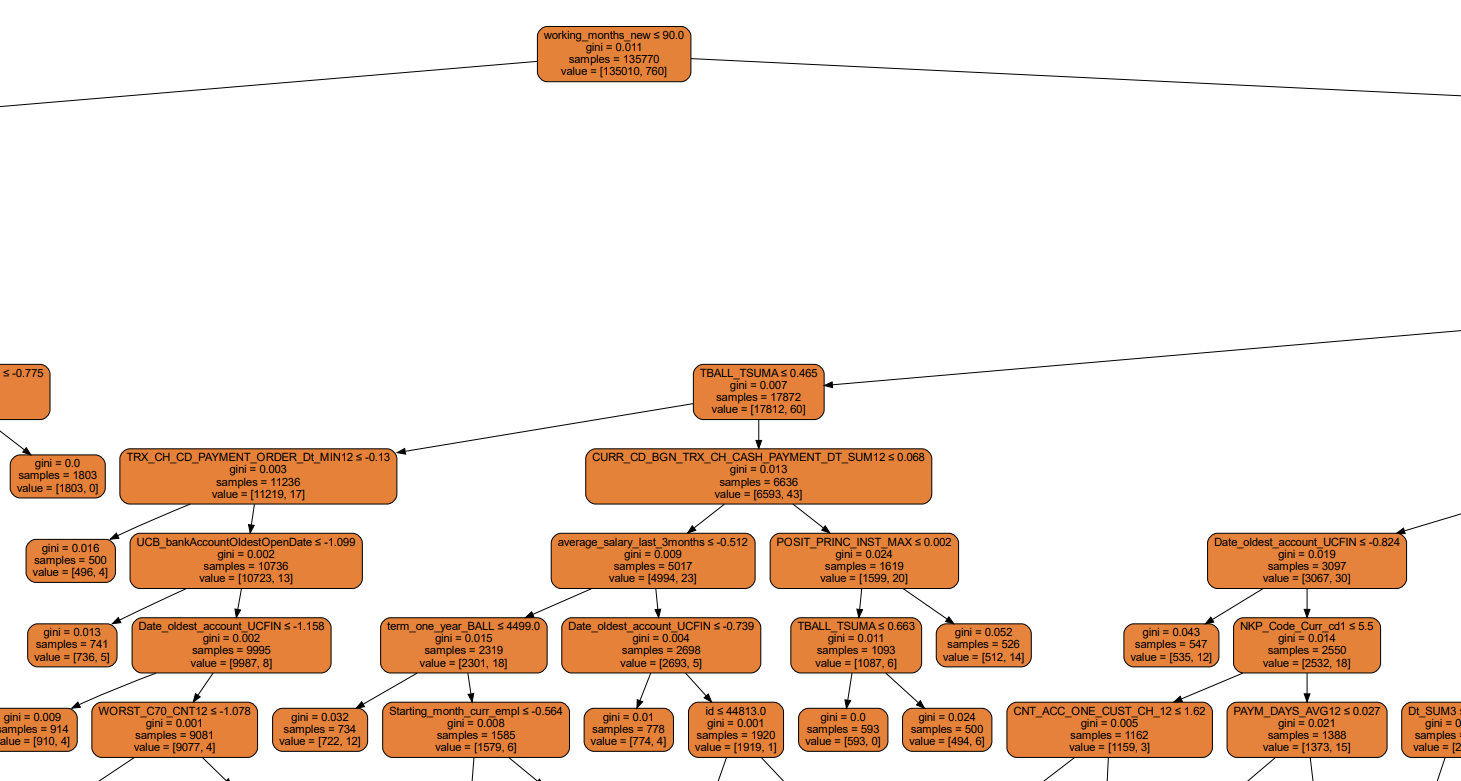

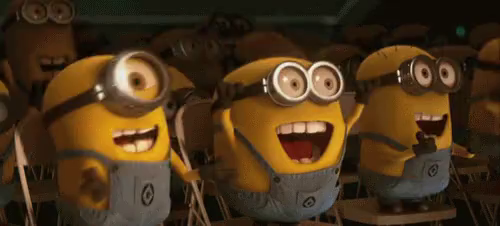

In [29]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[33747     0]
 [  196     0]]


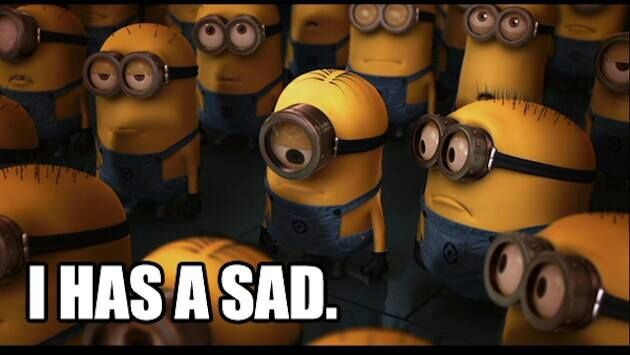

In [30]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy',
                                max_depth=3,
                                random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [31]:
y_pred_en = clf_en.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9942


In [33]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9944


In [35]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9944
Test set score: 0.9942


[Text(0.5, 0.875, 'X[2] <= 90.0\nentropy = 0.05\nsamples = 135770\nvalue = [135010, 760]'),
 Text(0.25, 0.625, 'X[83] <= -0.207\nentropy = 0.096\nsamples = 24531\nvalue = [24229, 302]'),
 Text(0.125, 0.375, 'X[68] <= 53.5\nentropy = 0.146\nsamples = 8797\nvalue = [8614, 183]'),
 Text(0.0625, 0.125, 'entropy = 0.099\nsamples = 4357\nvalue = [4301, 56]'),
 Text(0.1875, 0.125, 'entropy = 0.187\nsamples = 4440\nvalue = [4313, 127]'),
 Text(0.375, 0.375, 'X[68] <= 53.5\nentropy = 0.064\nsamples = 15734\nvalue = [15615, 119]'),
 Text(0.3125, 0.125, 'entropy = 0.034\nsamples = 8144\nvalue = [8115, 29]'),
 Text(0.4375, 0.125, 'entropy = 0.093\nsamples = 7590\nvalue = [7500, 90]'),
 Text(0.75, 0.625, 'X[72] <= -0.573\nentropy = 0.039\nsamples = 111239\nvalue = [110781, 458]'),
 Text(0.625, 0.375, 'X[73] <= -0.118\nentropy = 0.061\nsamples = 36525\nvalue = [36263, 262]'),
 Text(0.5625, 0.125, 'entropy = 0.038\nsamples = 18730\nvalue = [18654, 76]'),
 Text(0.6875, 0.125, 'entropy = 0.084\nsamples

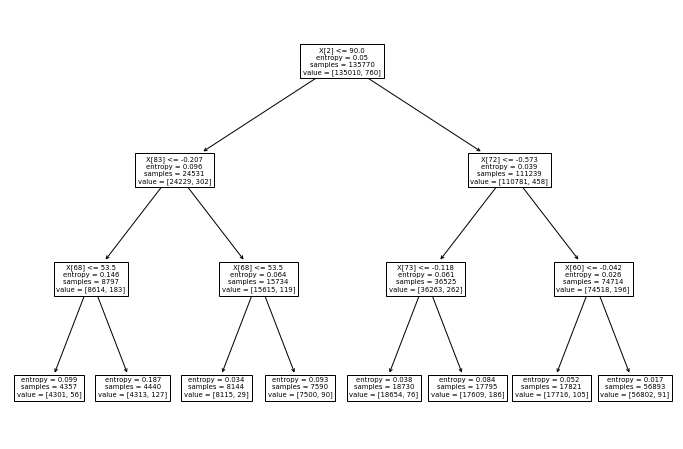

In [36]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [37]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=None,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph.render('dtree_render_example_entropy',view=True)

'dtree_render_example_entropy.pdf'

In [39]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix for Entropy\n\n', cm)

Confusion matrix for Entropy

 [[33747     0]
 [  196     0]]


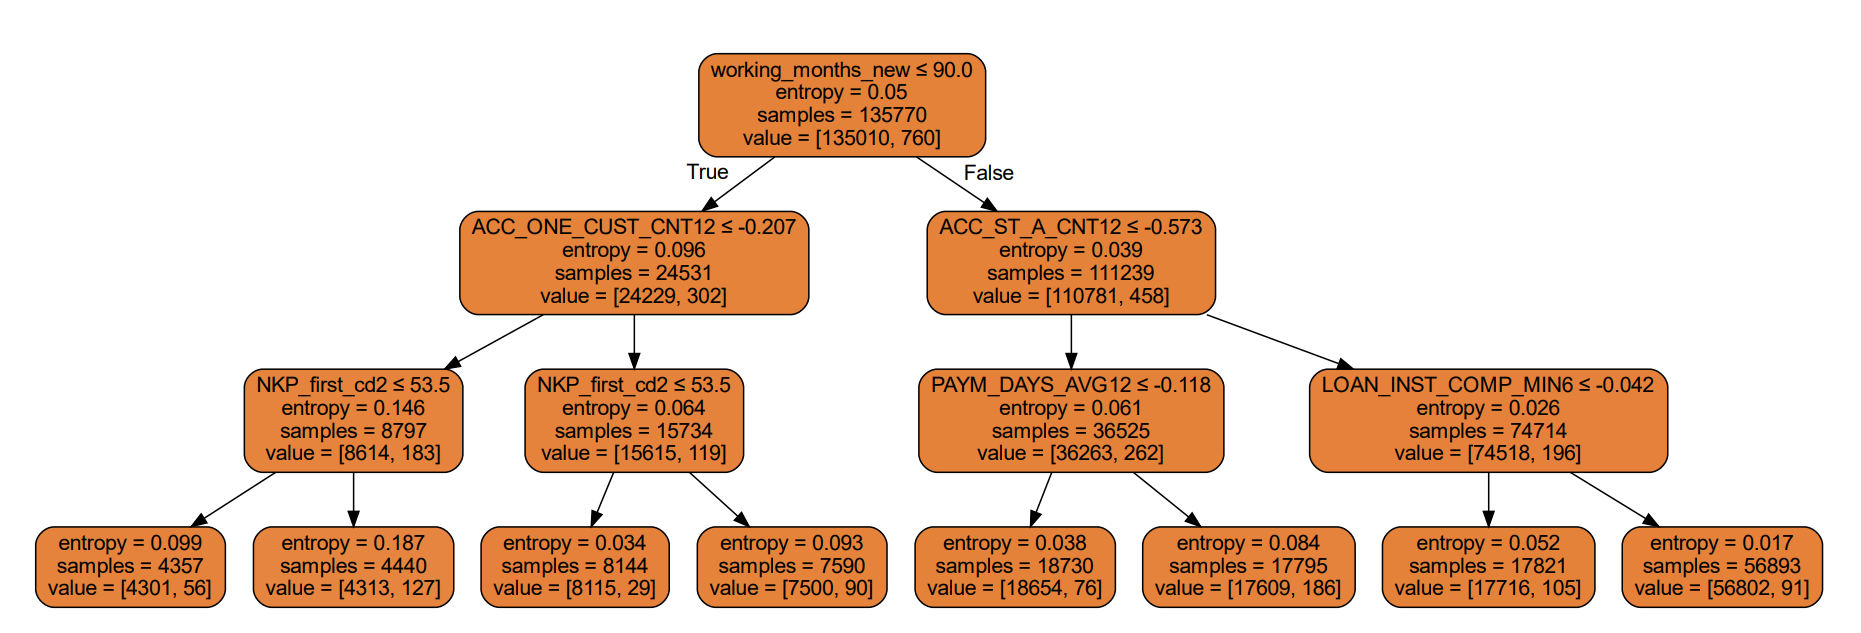


What to do now?
>>Going back to the data 
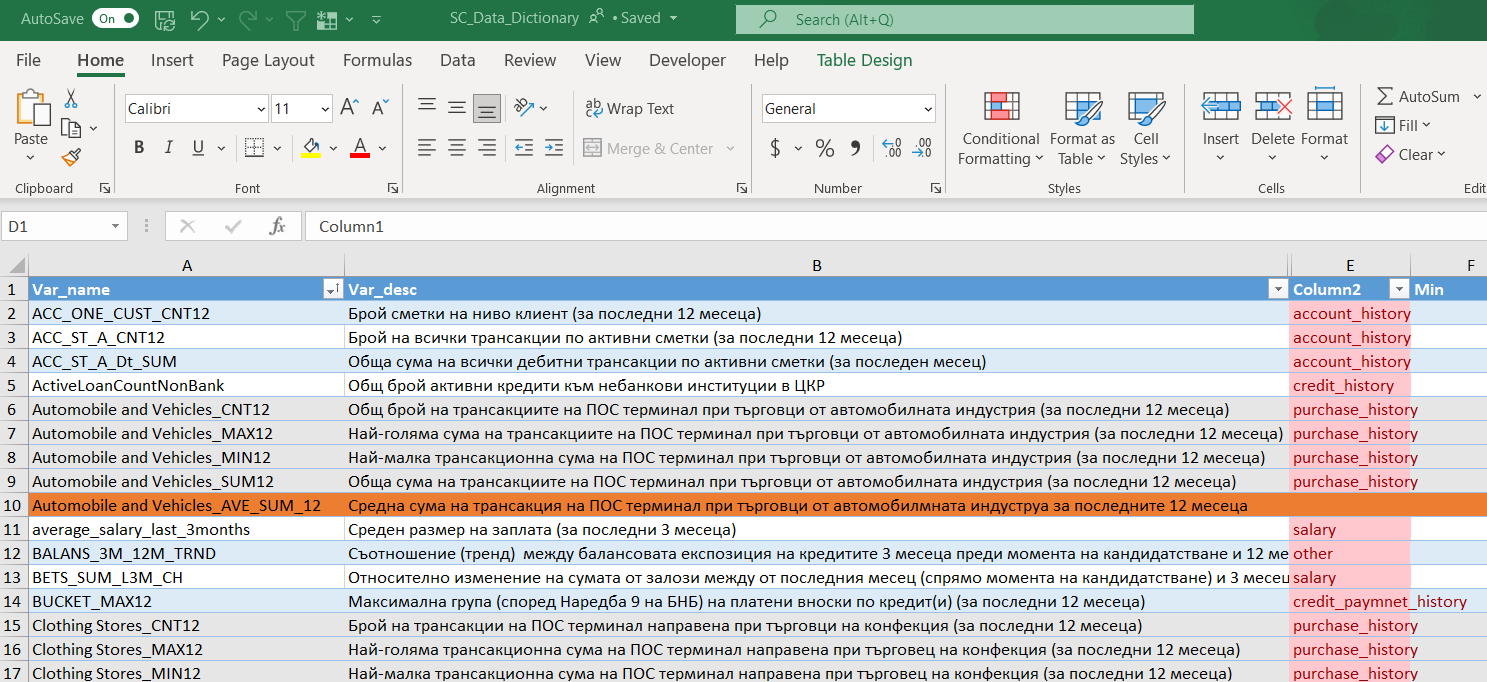

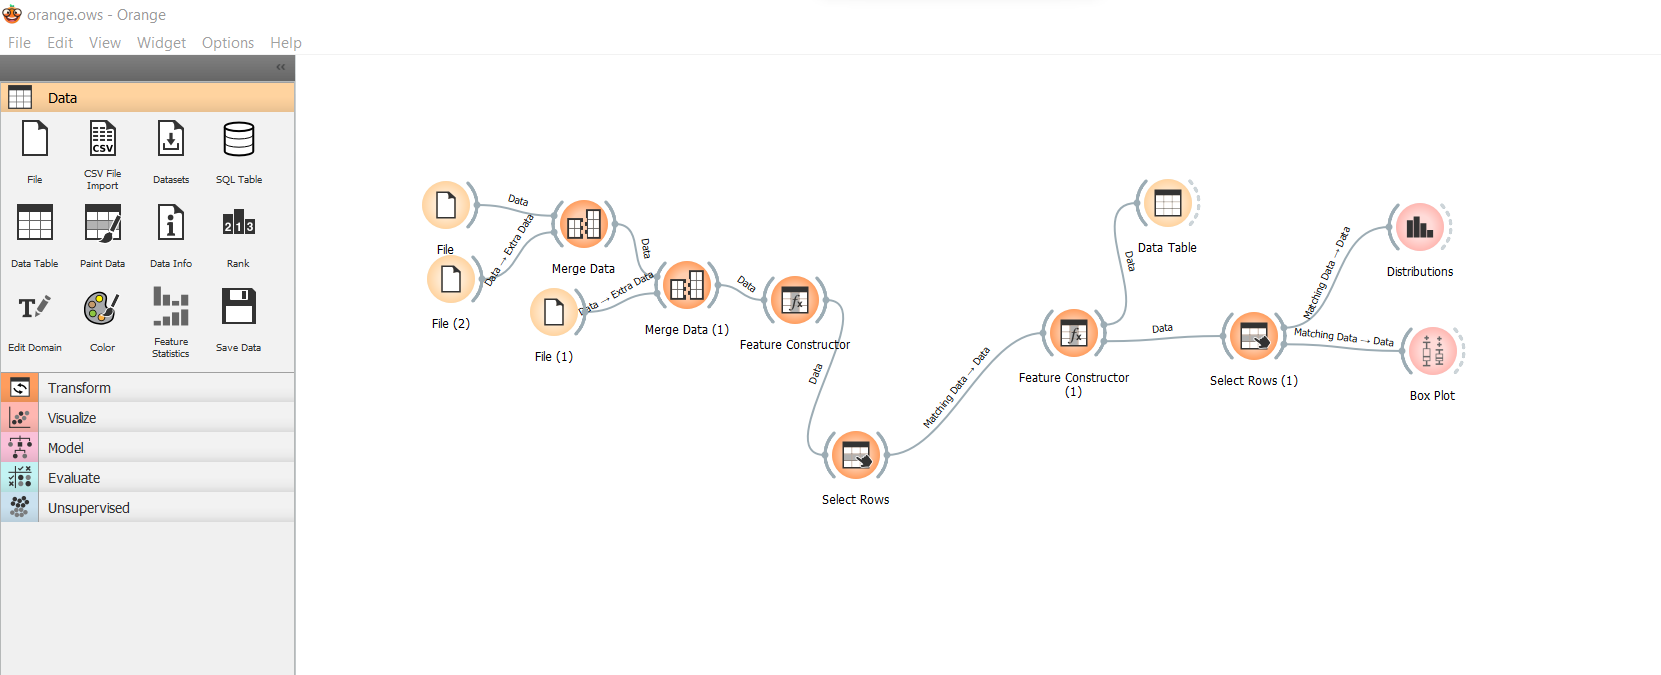

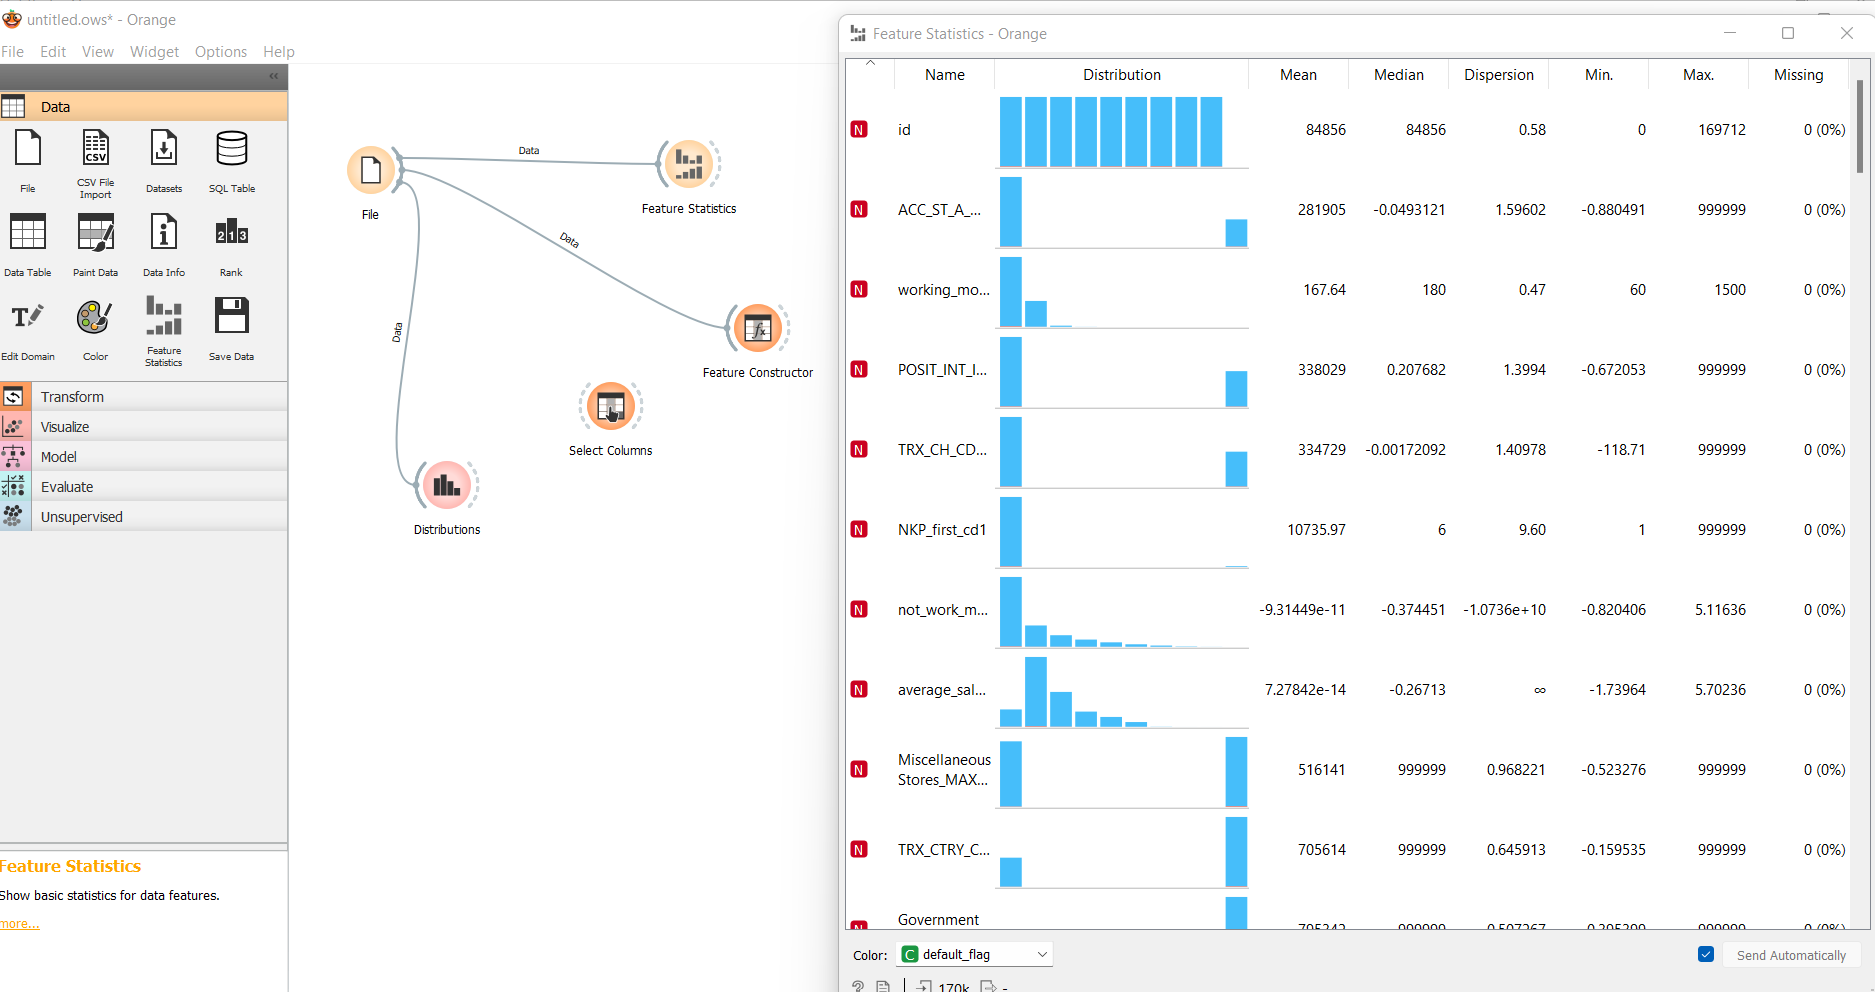

Confusion matrix 

 [33747 |  0]
 
 [  189  | 7]]

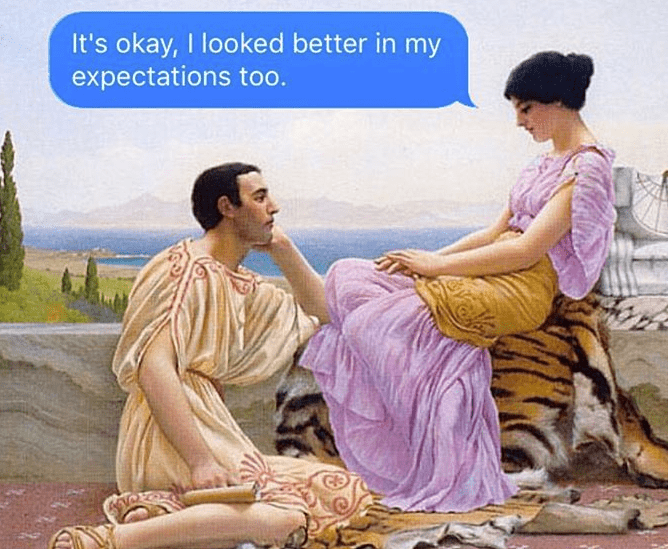